In [2]:
cd ..

E:\gdrive\Projects\Porto_Seguro\stacking


In [3]:
from utils import utils, gini, xgb_fn

import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from jupyterthemes import jtplot
jtplot.reset()

In [4]:
params = {}
params['tree_method']= 'hist'
params['silent']= True 
params['eval_metric']= 'auc'
params['objective']= 'binary:logistic'
params['eta']= 0.01
params['max_depth']= 5
params['gamma']= 0.3
params['min_child_weight']= 7
params['subsample']= 0.7 
params['colsample_bytree']= 0.6
params['max_delta_step']= 5

In [7]:
combined.columns

Index(['ps_car_13', 'ps_reg_03', 'ps_ind_05_cat', 'ps_ind_03', 'ps_ind_15',
       'ps_reg_02', 'ps_car_14', 'ps_car_12', 'ps_car_01_cat', 'ps_car_07_cat',
       'ps_ind_17_bin', 'ps_car_03_cat', 'ps_reg_01', 'ps_car_15', 'ps_ind_01',
       'ps_ind_16_bin', 'ps_ind_07_bin', 'ps_car_06_cat', 'ps_car_04_cat',
       'ps_ind_06_bin', 'ps_car_09_cat', 'ps_car_02_cat', 'ps_ind_02_cat',
       'ps_car_11', 'ps_car_05_cat', 'ps_calc_09', 'ps_calc_05',
       'ps_ind_08_bin', 'ps_car_08_cat', 'ps_ind_09_bin', 'ps_ind_04_cat',
       'ps_ind_18_bin', 'ps_ind_12_bin', 'ps_ind_14'],
      dtype='object')

In [8]:
combined = utils.load_data()
# calc = combined[combined.columns[combined.columns.str.contains('calc')]]
# calc = pd.get_dummies(calc, columns=calc.columns)
# calc = calc[['ps_calc_02_0.0', 'ps_calc_02_0.1', 'ps_calc_05_3', 'ps_calc_06_7', 'ps_calc_06_10', 
# 'ps_calc_07_5', 'ps_calc_08_8', 'ps_calc_08_10', 'ps_calc_10_8', 'ps_calc_11_5', 'ps_calc_11_7', 'ps_calc_11_8']]
reg = combined[combined.columns[combined.columns.str.contains('reg')]]
combined = utils.bojan_engineer(combined)
# combined = pd.concat([combined, calc], axis=1)

train, test = utils.recover_train_test_na(combined)

In [24]:
X_percent_test = pd.read_csv('data/percent_test.csv')

In [19]:
X = pd.read_csv('data/percent_train.csv').drop(['id', 'target'], 
X = X.drop(X.columns[X.columns.str.contains('calc')], axis=1)

In [22]:
# X = train.drop('target', axis=1)
y = train.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=88, stratify=y)

xg_train = xgb.DMatrix(X_train, label=y_train)
xg_val = xgb.DMatrix(X_val, label=y_val)
watchlist = [(xg_train, 'train'), (xg_val, 'test')]
xgb_skf = xgb.train(params, xg_train, 10000, watchlist, early_stopping_rounds=100
                    , feval=gini.gini_xgb, maximize=True, verbose_eval=100)
print(xgb_skf.best_score)

[0]	train-auc:0.608813	test-auc:0.601414	train-gini:0.218251	test-gini:0.201846
Multiple eval metrics have been passed: 'test-gini' will be used for early stopping.

Will train until test-gini hasn't improved in 100 rounds.
[100]	train-auc:0.637344	test-auc:0.625678	train-gini:0.274688	test-gini:0.251355
[200]	train-auc:0.64062	test-auc:0.627051	train-gini:0.28124	test-gini:0.254101
[300]	train-auc:0.644192	test-auc:0.628987	train-gini:0.288383	test-gini:0.257974
[400]	train-auc:0.649507	test-auc:0.631315	train-gini:0.299014	test-gini:0.262629
[500]	train-auc:0.655328	test-auc:0.633939	train-gini:0.310655	test-gini:0.267879
[600]	train-auc:0.660832	test-auc:0.636416	train-gini:0.321663	test-gini:0.272832
[700]	train-auc:0.666163	test-auc:0.638216	train-gini:0.332326	test-gini:0.276431
[800]	train-auc:0.670676	test-auc:0.639403	train-gini:0.341351	test-gini:0.278806
[900]	train-auc:0.675037	test-auc:0.640404	train-gini:0.350074	test-gini:0.280809
[1000]	train-auc:0.678883	test-auc:0.641

In [166]:
for i in potential2:
    X = pd.concat([train.drop('target', axis=1), calc_dummies[i]], axis=1)
    y = train.target
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=88, stratify=y)
    
    xg_train = xgb.DMatrix(X_train, label=y_train)
    xg_val = xgb.DMatrix(X_val, label=y_val)
    watchlist = [(xg_train, 'train'), (xg_val, 'test')]
    xgb_skf = xgb.train(params, xg_train, 10000, watchlist, early_stopping_rounds=100
                        , feval=gini.gini_xgb, maximize=True, verbose_eval=False)
    print(i, xgb_skf.best_score)

['ps_calc_11_1', 'ps_calc_11_7'] 0.284827
['ps_calc_11_1', 'ps_calc_11_8'] 0.284863
['ps_calc_11_1', 'ps_calc_11_9'] 0.284835
['ps_calc_11_5', 'ps_calc_11_7'] 0.284753
['ps_calc_11_5', 'ps_calc_11_8'] 0.284681
['ps_calc_11_5', 'ps_calc_11_9'] 0.285074
['ps_calc_11_7', 'ps_calc_11_8'] 0.284469
['ps_calc_11_7', 'ps_calc_11_9'] 0.284685
['ps_calc_11_8', 'ps_calc_11_9'] 0.285242
['ps_calc_12_3', 'ps_calc_12_4'] 0.284671
['ps_calc_13_6', 'ps_calc_13_7'] 0.284979


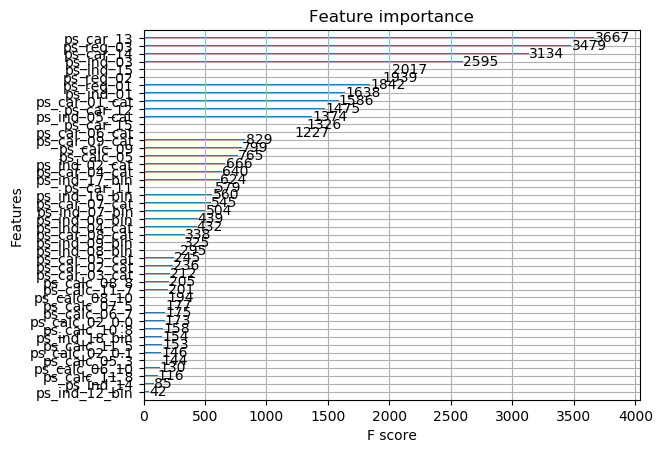

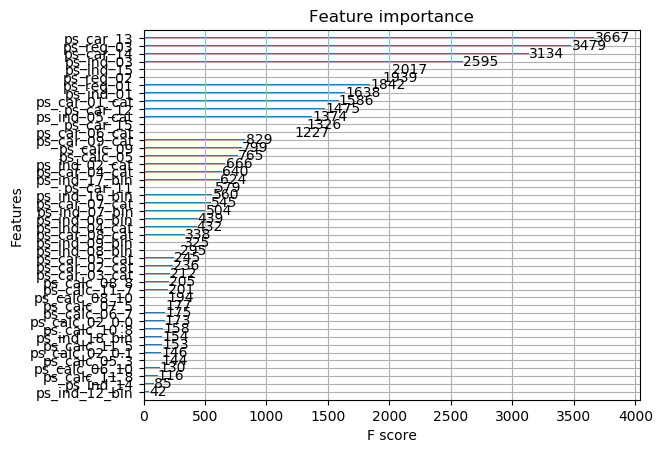

In [9]:
xgb.plot_importance(xgb_skf)
plt.show()

In [151]:
selected.sum()

ps_calc_10_0      139
ps_calc_10_5    46181
dtype: int64

In [146]:
xgb_skf.get_fscore()

{'ps_calc_10_5': 196,
 'ps_car_01_cat': 1899,
 'ps_car_02_cat': 270,
 'ps_car_04_cat': 705,
 'ps_car_05_cat': 305,
 'ps_car_06_cat': 1416,
 'ps_car_07_cat': 561,
 'ps_car_08_cat': 372,
 'ps_car_09_cat': 994,
 'ps_car_11': 760,
 'ps_car_11_cat': 2161,
 'ps_car_12': 1784,
 'ps_car_13': 4439,
 'ps_car_14': 3823,
 'ps_car_15': 1620,
 'ps_ind_01': 1944,
 'ps_ind_02_cat': 819,
 'ps_ind_03': 3137,
 'ps_ind_04_cat': 549,
 'ps_ind_05_cat': 1506,
 'ps_ind_06_bin': 476,
 'ps_ind_07_bin': 577,
 'ps_ind_08_bin': 382,
 'ps_ind_09_bin': 348,
 'ps_ind_14': 132,
 'ps_ind_15': 2480,
 'ps_ind_16_bin': 691,
 'ps_ind_17_bin': 667,
 'ps_reg_01': 2080,
 'ps_reg_02': 2470,
 'ps_reg_03': 4469}